# Train Iris Classifier to be Deployed

Sources: 
* https://medium.com/@deveshssurve/flask-with-colab-machine-learning-iris-classification-1368faf7e217
* https://medium.com/@nutanbhogendrasharma/deploy-machine-learning-model-with-flask-on-heroku-cd079b692b1d

First of all here’s what we are going to do :

    1. Build a Machine Learning Classification Model for Iris Data set
    2. Integrate the Prediction Function of the Model with Flask APIs
    3. Build basic Html CSS bootstrap front end to interact with our model and get predictions

# ML Model

Problem solving:

Now, here are the basic steps we perform when we are creating a Machine Learning Model.

    Create a dataset.
    Build a model
    Train the model
    Make predictions.

Iris Flower:

So we shall be classifying iris into 3 species :

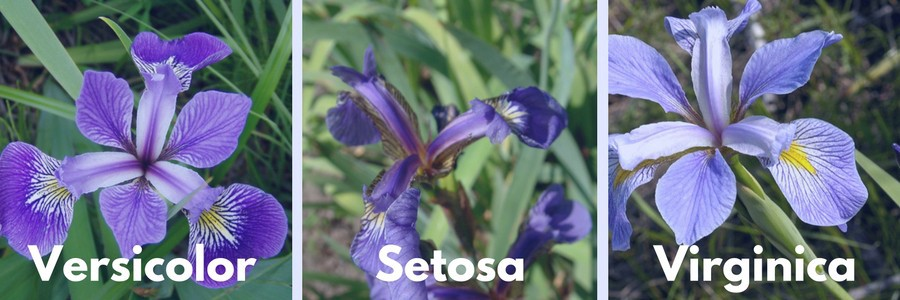

Since we are using scikit-learn over here, we do get an in-built dataset for the iris classification problem.

Here’s a sample of our dataset :
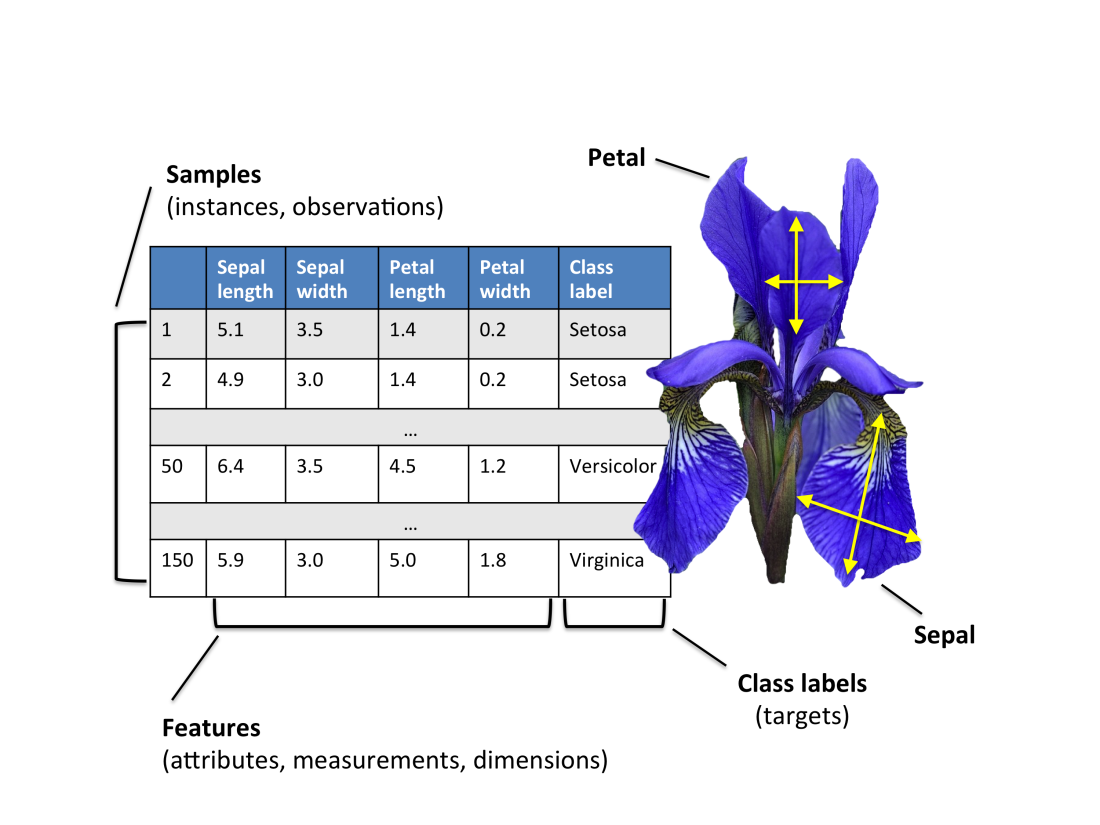

We can see that we have 4 features and 3 labels over here :

    Labels :Iris setosa, Iris virginica and Iris versicolor
    Features : Sepal length,Sepal width,Petal length,Petal Width in cm

First we load the Iris dataset as follows :

In [1]:
from  sklearn import  datasets
iris=datasets.load_iris()

In [2]:
print(iris.DESCR[:1000])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
import pandas as pd
df = pd.DataFrame(iris.data)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
x=iris.data
y=iris.target

Train Test Split

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.5)

Define classifier

In [8]:
from sklearn import neighbors
model=neighbors.KNeighborsClassifier(n_neighbors=4)

In [9]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [10]:
predictions=model.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.96


In [12]:
import numpy as np

def score(sample):
    np_sample = np.array(sample)
    pred = model.predict(np_sample.reshape(1, -1)).tolist()
    return ['setosa', 'versicolor', 'virginica'][pred[0]]

In [13]:
score([0,1,2,4])

'setosa'

In [14]:
# Saving model to disk
import pickle
pickle.dump(model, open('model.pkl','wb'))

# Create virtualenv for the application

Disable pyenv: pyenv shell system

* `python3 -m venv flask-ml`
* Source it `source flask-ml/bin/activate` / `. flask-ml/bin/activate`
* Install packages `$ pip install Flask numpy sklearn`

# Run Application

```bash
# create simple builtin server 
$ export FLASK_APP=app.py

```

# Enable debug mode
```bash
export FLASK_ENV=development
```

# Run the Application

```bash
flask run
```

Then there is no need for

```python
if __name__ == "__main__":
    app.run(debug=True)
```

# Deploy to Heroku

See: https://medium.com/@nutanbhogendrasharma/deploy-machine-learning-model-with-flask-on-heroku-cd079b692b1d

See deployed webapp: https://iris-ml-plaksha.herokuapp.com/